# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

Loading the data:

In [16]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-bv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-bv/mcEcc_ct-bv_p0_s1_2016-11-01_1712
(96, 39)
Index([u'expName', u'time', u'participant', u'session', u'trialN', u'dirL', u'dirR', u'vL', u'vR', u'szL', u'szR', u'sfL', u'sfR', u'tfL', u'tfR', u'BvL', u'BvR', u'BsfL', u'BsfR', u'colorL', u'colorR', u'sat', u'fovGap', u'fovFade', u'periGap', u'periFade', u'trialT', u'nFrames', u'nNa', u'nf000', u'nf090', u'nf180', u'nf270', u'pd000', u'pd090', u'pd180', u'pd270', u'qnResp', u'ringSz'], dtype='object')


Transforming the data set first.

In [17]:
ds['bvDiff'] = abs(ds['BvR'] - ds['BvL'])
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

        expName             time  participant  session  trialN  dirL  dirR  \
0  mc_ecc_ct_bv  2016-11-01_1712            0        1       1   180     0   
1  mc_ecc_ct_bv  2016-11-01_1712            0        1       2     0   180   
2  mc_ecc_ct_bv  2016-11-01_1712            0        1       3   180     0   
3  mc_ecc_ct_bv  2016-11-01_1712            0        1       4     0   180   
4  mc_ecc_ct_bv  2016-11-01_1712            0        1       5     0   180   

   vL  vR  szL  ...    nf090  nf180  nf270  pd000     pd090  pd180     pd270  \
0   0   0  256  ...        0      0      1      0  0.000000      0  0.016667   
1   0   0  256  ...        0      0      1      0  0.000000      0  0.016667   
2   0   0  256  ...        1      0      0      0  0.016667      0  0.000000   
3   0   0  256  ...        0      0      1      0  0.000000      0  0.016667   
4   0   0  256  ...        1      0      0      0  0.016667      0  0.000000   

   qnResp      ringSz bvDiff  
0       0   62.6571

## Visualization

Upward predominance.

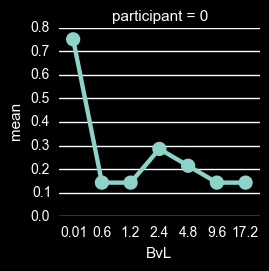

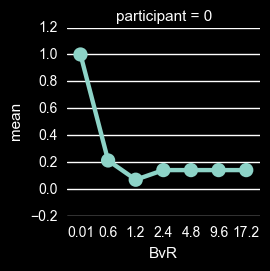

In [34]:
sumLD = ds.groupby(['BvL','participant'])['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumRD = ds.groupby(['BvR','participant'])['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
g = sns.factorplot(x='BvL', y='mean', col='participant', data=sumLD, size=2.8)
g = sns.factorplot(x='BvR', y='mean', col='participant', data=sumRD, size=2.8)

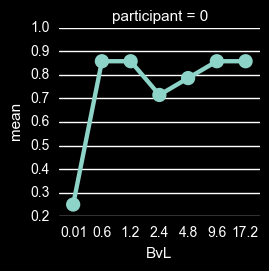

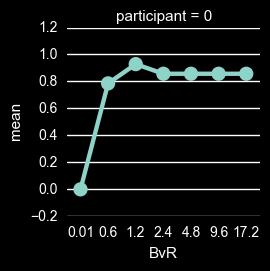

In [36]:
sumLU = ds.groupby(['BvL','participant'])['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
sumRU = ds.groupby(['BvR','participant'])['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
g = sns.factorplot(x='BvL', y='mean', col='participant', data=sumLU, size=2.8)
g = sns.factorplot(x='BvR', y='mean', col='participant', data=sumRU, size=2.8)

Looking at the instances of when the slow-motion center ring occurred vs. when it didn't (proportion), and large was the resulting ring in those instances (mean ring size).

(-0.1, 1.1)

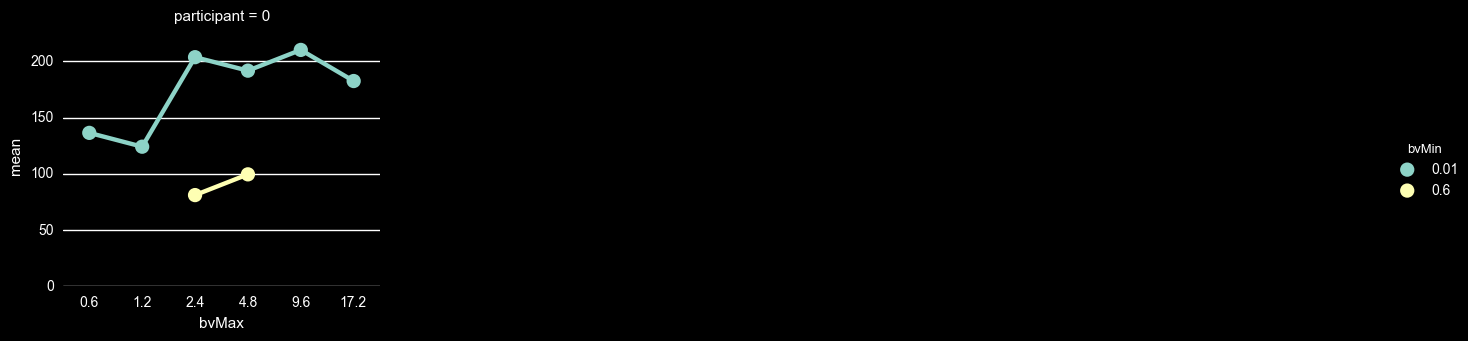

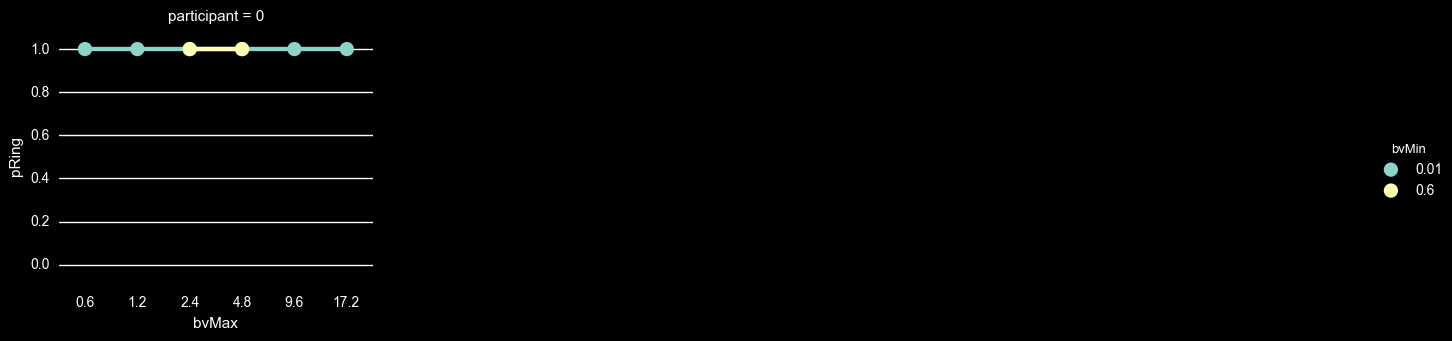

In [50]:
# Rewring the ring size column so that the minimum size is equated to zero:
ds.ix[ds['ringSz']==25.8,'ringSz'] = 0
ds.ix[ds['nf270']==1,'resp'] = 'slow'
ds.ix[ds['nf090']==1,'resp'] = 'fast'
# Creating columns for the slower and faster of the two speeds:
ds['bvMin'] = np.amin([ds['BvL'], ds['BvR']], axis=0)
ds['bvMax'] = np.amax([ds['BvL'], ds['BvR']], axis=0)
# Computing the proportion of instances when the ring has occurred:
ss = ds[ds.resp=='slow']
sumMM_p = ss.groupby(['bvMin','bvMax','participant'])['ringSz'].agg([np.count_nonzero, 
                                                                     np.size]).reset_index()
sumMM_p['pRing'] = sumMM_p['count_nonzero'] / sumMM_p['size']
sumMM_p['bvMin'] = sumMM_p['bvMin']
sumMM_p['bvMax'] = sumMM_p['bvMax']
#print sumMM_p['ringSz']
# Getting the subset where the ring size is nonzero and computing the mean size:
ss = ss[ss.ringSz!=0]
sumMM_m = ss.groupby(['bvMin','bvMax','participant'])['ringSz'].agg([np.mean,
                                                                     np.std]).reset_index()
sumMM_m['bvMin'] = sumMM_m['bvMin']
sumMM_m['bvMax'] = sumMM_m['bvMax']
#print sumMM_m['ringSz']
# Plotting:
sns.factorplot(x='bvMax', y='mean', hue='bvMin', col='participant', data=sumMM_m, 
               col_wrap=4, size=3.5)
plt.ylim(0,230)
sns.factorplot(x='bvMax', y='pRing', hue='bvMin', col='participant', data=sumMM_p, 
               col_wrap=4, size=3.5)
plt.ylim(-0.1,1.1)

Fast motion in the center.

(-0.1, 1.1)

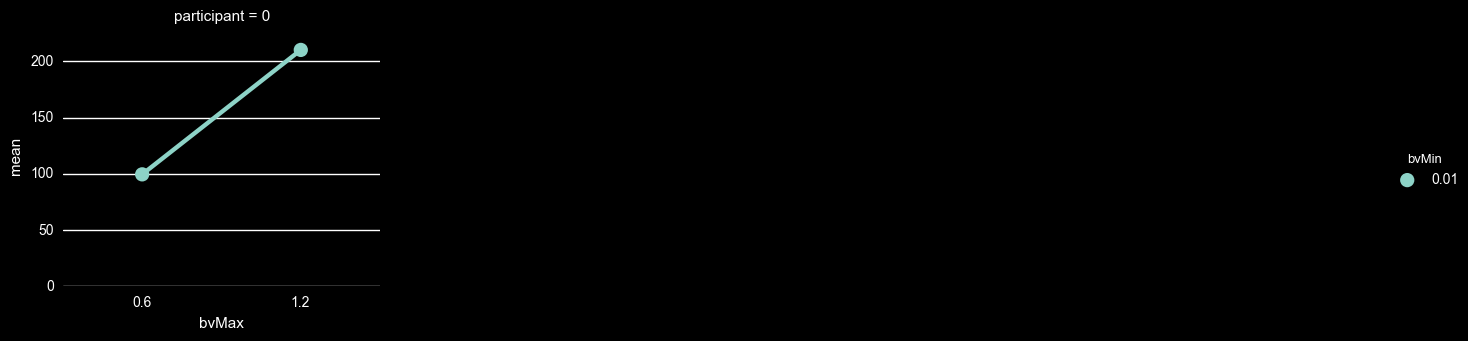

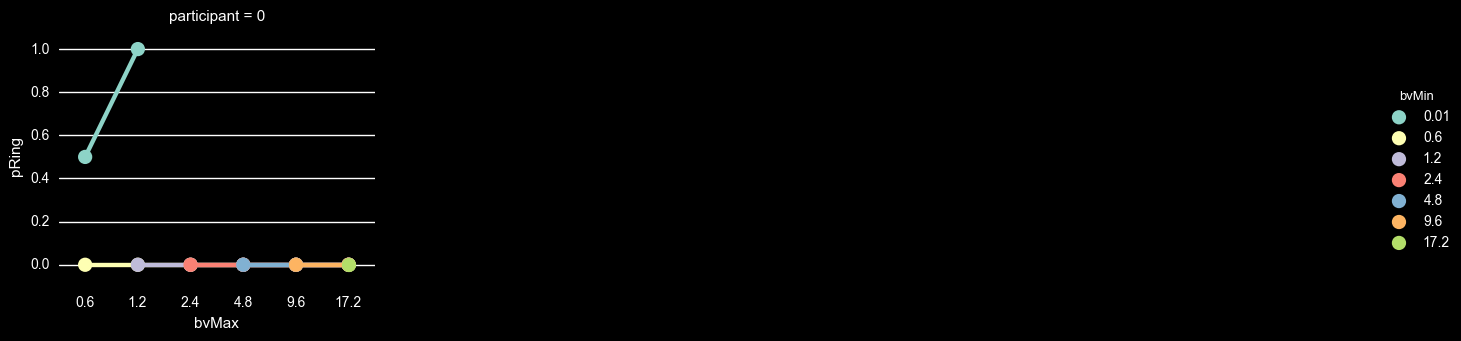

In [49]:
# Computing the proportion of instances when the ring has occurred:
ss = ds[ds.resp=='fast']
sumMM_p = ss.groupby(['bvMin','bvMax','participant'])['ringSz'].agg([np.count_nonzero, 
                                                                     np.size]).reset_index()
sumMM_p['pRing'] = sumMM_p['count_nonzero'] / sumMM_p['size']
sumMM_p['bvMin'] = sumMM_p['bvMin']
sumMM_p['bvMax'] = sumMM_p['bvMax']
#print sumMM_p['ringSz']
# Getting the subset where the ring size is nonzero and computing the mean size:
ss = ss[ss.ringSz!=0]
sumMM_m = ss.groupby(['bvMin','bvMax','participant'])['ringSz'].agg([np.mean,
                                                                     np.std]).reset_index()
sumMM_m['bvMin'] = sumMM_m['bvMin']
sumMM_m['bvMax'] = sumMM_m['bvMax']
#print sumMM_m['ringSz']
# Plotting:
sns.factorplot(x='bvMax', y='mean', hue='bvMin', col='participant', data=sumMM_m, 
               col_wrap=4, size=3.5)
plt.ylim(0,230)
sns.factorplot(x='bvMax', y='pRing', hue='bvMin', col='participant', data=sumMM_p, 
               col_wrap=4, size=3.5)
plt.ylim(-0.1,1.1)

# Eye-tracking data

## Data import

In [3]:
subjEtPath = glob.glob(allSubjDirs[6] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges
ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

/Users/egor/Dropbox/Projects/mc/data/mcvct/mcvct_p2_s1_2016-10-25_1541/data.asc


KeyError: 'onset'

In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd